<a href="https://colab.research.google.com/github/cbbarnes/MSDS-Computer-Vision/blob/master/FashionMNIST_Demo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Model for the Fashion MNIST dataset

Import Python modules and import Fashion MNIST data using keras.

In [0]:
import tensorflow as tf
import numpy as np
import keras
import time

import matplotlib.pyplot as plt

import distutils
if distutils.version.LooseVersion(tf.__version__) < '1.14':
    raise Exception('This notebook is compatible with TensorFlow 1.14 or higher, for TensorFlow 1.13 or lower please use the previous version at https://github.com/tensorflow/tpu/blob/r1.13/tools/colab/fashion_mnist.ipynb')

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()



Data Visualization

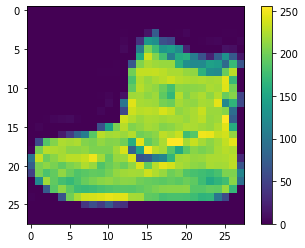

In [54]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

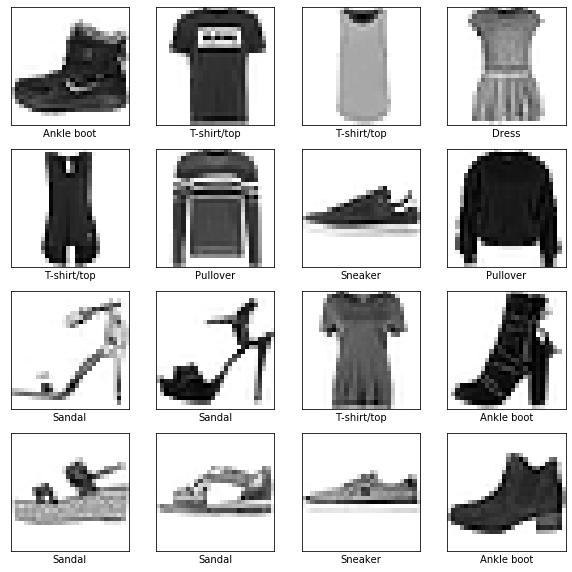

In [55]:
# assign class names for each label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(16):
	plt.subplot(4,4, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(x_train[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[y_train[i]])

Print Shape of datasets

In [56]:
# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#split training set into validation set
x_val = x_train[:10000]
partial_xtrain = x_train[10000:]

y_val = y_train[:10000]
partial_ytrain = y_train[10000:]


print("Shape of x train:", partial_xtrain.shape)
print("Shape of x val:",x_val.shape)
print("Shape of x test:",x_test.shape)
print("Shape of y train:",partial_ytrain.shape)
print("Shape of y val:",y_val.shape)
print("Shape of y test:",y_test.shape)

Shape of x train: (50000, 28, 28, 1)
Shape of x val: (10000, 28, 28, 1)
Shape of x test: (10000, 28, 28, 1)
Shape of y train: (50000,)
Shape of y val: (10000,)
Shape of y test: (10000,)


Normalize the data

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Define the model

In [47]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

Compile model

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Fit model

In [49]:
start = time.time()
history = model.fit(partial_xtrain,
         partial_ytrain,
         batch_size=64,
         validation_data=(x_val,y_val),
         epochs=10)

end = time.time()
modeltime = end - start

# can also try %timeit 

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 1.2331 - acc: 0.6762 - val_loss: 0.4721 - val_acc: 0.8223
Epoch 2/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.5631 - acc: 0.7895 - val_loss: 0.3864 - val_acc: 0.8569
Epoch 3/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.4846 - acc: 0.8219 - val_loss: 0.3499 - val_acc: 0.8709
Epoch 4/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.4451 - acc: 0.8375 - val_loss: 0.3275 - val_acc: 0.8772
Epoch 5/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.4177 - acc: 0.8479 - val_loss: 0.3152 - val_acc: 0.8831
Epoch 6/10
50000/50000 [==============================] - 59s 1ms/sample - loss: 0.3938 - acc: 0.8554 - val_loss: 0.2890 - val_acc: 0.8917
Epoch 7/10
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.3816 - acc: 0.8596 - val_loss: 0.

In [50]:
print("Total processing time:", modeltime/60, "minutes")

Total processing time: 9.988256255785624 minutes


In [51]:
train_loss, train_acc = model.evaluate(partial_xtrain, partial_ytrain)

print('train loss is', train_loss)
print('train accuracy is', train_acc)

50000/50000 [==============================] - 17s 337us/sample - loss: 0.2460 - acc: 0.9091
train loss is 0.24601787600755692
train accuracy is 0.90914


In [57]:
val_loss, val_acc = model.evaluate(x_val, y_val)

print('validation loss is', val_loss)
print('validation accuracy is', val_acc)

10000/10000 [==============================] - 3s 326us/sample - loss: 0.2698 - acc: 0.9020
validation loss is 0.2698274844646454
validation accuracy is 0.902


In [58]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('test loss is', test_loss)
print('test accuracy is', test_acc)

10000/10000 [==============================] - 3s 328us/sample - loss: 0.2903 - acc: 0.8915
test loss is 0.29030843002796175
test accuracy is 0.8915



<table>
<tr>
<th>Dataset</th>
<th>Accuracy</th>
<th>Loss</th>
</tr>
<tr>
<td>Train</td>
<td>0.9091</td>
<td>0.246</td>
</tr>
<tr>
<td>Validation</td>
<td>0.902</td>
<td>0.2698</td>
</tr>
<tr>
<td>Test</td>
<td>0.8915</td>
<td>0.2903</td>
</tr>
</table>

Plot training and validation accuracy over 10 epochs

<function matplotlib.pyplot.show>

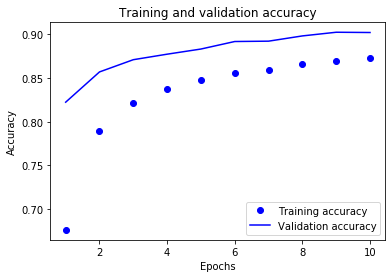

In [59]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs,val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.show

Plot training and validation loss over 10 epochs

<function matplotlib.pyplot.show>

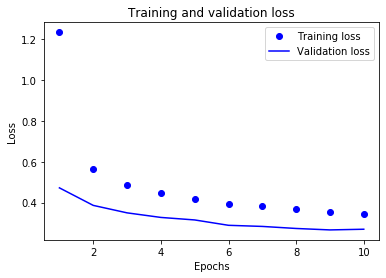

In [60]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs,val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show